In [1]:
from shapely.geometry import Point, Polygon
import shapefile as shp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import contextily as ctx
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("apartments.csv")
pts_col = []

for pt in df[["XCoord", "YCoord"]].itertuples():
    pts_col.append(Point(pt.XCoord, pt.YCoord))
df["geometry"] = pts_col

df = gpd.GeoDataFrame(df)
df = df.set_crs("esri:103412")
df = df.to_crs(epsg=4326)

#df = df[["Address", "PropertyUse", "PropertyClass", "Bedrooms", "geometry", "XCoord", "YCoord"]]

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (42,43,104,109,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
pd.set_option('display.max_rows', 250)
#df[df['PropertyUse'] == 'Apartments & rooms']['NetTaxes']
#df[df['PropertyUse'] == 'Apartment & store']['NetTaxes']
#df[df['PropertyUse'] == 'Apartment & office']['NetTaxes']
#df[df['PropertyUse'] == 'Apartments']['NetTaxes']

1430         0.00
10193       36.36
18734    19209.39
27371    71142.77
36552      101.81
41574      106.65
60641        0.00
61839        0.00
66039        0.00
68311        0.00
68663        0.00
Name: NetTaxes, dtype: float64

In [3]:
df.groupby(['PropertyClass']).count()

,Address,PropertyUse,Bedrooms,geometry,XCoord,YCoord
PropertyClass,,,,,,
Agricultural,783,783,783,783,783,783
Commercial,6308,6300,6308,6308,6308,6308
Industrial,119,119,119,119,119,119
Residential,73166,73151,73166,73166,73166,73166


In [4]:
df.groupby(['PropertyUse']).count()

,Address,PropertyClass,Bedrooms,geometry,XCoord,YCoord
PropertyUse,,,,,,
0 unit Apartment,2,2,2,2,2,2
10 unit Apartment,23,23,23,23,23,23
100 unit Apartment,3,3,3,3,3,3
104 unit Apartment,3,3,3,3,3,3
105 unit Apartment,2,2,2,2,2,2
...,...,...,...,...,...,...
Warehouse 1 story,127,127,127,127,127,127
Warehouse 2+ stories,8,8,8,8,8,8
"Warehouse, mini type",32,32,32,32,32,32


In [5]:
commercial = df[df["PropertyClass"] == "Commercial"]
commercial['Apartment'] = commercial['PropertyUse'].str.contains("Apartment")
com_apt = commercial[commercial['Apartment'] == True]
com_apt.groupby(['PropertyUse']).count()
# result: 1164 of 6308 commercial properties has 'Apartment' in it.
# why only a small portion of k12 living in apartment -> we previously exclude all these commercial apartments. 

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,Address,PropertyClass,Bedrooms,geometry,XCoord,YCoord,Apartment
PropertyUse,,,,,,,
0 unit Apartment,2,2,2,2,2,2,2
10 unit Apartment,23,23,23,23,23,23,23
100 unit Apartment,3,3,3,3,3,3,3
104 unit Apartment,3,3,3,3,3,3,3
105 unit Apartment,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
96 unit Apartment,3,3,3,3,3,3,3
Apartment & office,44,44,44,44,44,44,44
Apartment & store,202,202,202,202,202,202,202


In [6]:
commercial[commercial['PropertyUse'] == 'Apartments & rooms']

,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord,Apartment
3062,2005 Monroe St,Apartments & rooms,Commercial,0,POINT (-89.41883 43.06345),811907.652579,478731.749687,True
3482,134 E Gorham St,Apartments & rooms,Commercial,0,POINT (-89.38598 43.07921),820685.627388,484476.565419,True
5218,209 E Mifflin St,Apartments & rooms,Commercial,0,POINT (-89.38269 43.07713),821564.402373,483718.529889,True
22418,127 W Gilman St,Apartments & rooms,Commercial,0,POINT (-89.39049 43.07653),819480.603663,483500.543118,True
28176,423 N Pinckney St,Apartments & rooms,Commercial,0,POINT (-89.38716 43.07898),820370.842200,484393.857290,True
44798,635 Howard Pl,Apartments & rooms,Commercial,0,POINT (-89.39462 43.07678),818377.507169,483590.716594,True
54572,12 Langdon St,Apartments & rooms,Commercial,0,POINT (-89.39065 43.07897),819437.138467,484388.403721,True
58918,45 N Orchard St,Apartments & rooms,Commercial,0,POINT (-89.40691 43.06945),815094.234032,480917.978556,True
75568,28 E Gilman St,Apartments & rooms,Commercial,0,POINT (-89.38798 43.07902),820152.099647,484405.733205,True
75574,134 W Gorham St,Apartments & rooms,Commercial,0,POINT (-89.39023 43.07621),819549.260735,483383.263565,True


In [7]:
commercial.columns

Index(['Address', 'PropertyUse', 'PropertyClass', 'Bedrooms', 'geometry',
       'XCoord', 'YCoord', 'Apartment'],
      dtype='object')

In [8]:
df[df['PropertyClass'] == 'Residential'].groupby('PropertyUse').count()

,Address,PropertyClass,Bedrooms,geometry,XCoord,YCoord
PropertyUse,,,,,,
2 Unit,3230,3230,3230,3230,3230,3230
2 unit Apartment,1,1,1,1,1,1
3 To 7 Unit,6,6,6,6,6,6
3 unit Apartment,570,570,570,570,570,570
4 unit Apartment,939,939,939,939,939,939
5 unit Apartment,126,126,126,126,126,126
6 unit Apartment,128,128,128,128,128,128
7 unit Apartment,39,39,39,39,39,39
Condominium,17029,17029,17029,17029,17029,17029


In [9]:
vacant = df[df['PropertyUse'] == 'Vacant']
vacant

,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord
24,2419 Dunns Marsh Ter,Vacant,Residential,0,POINT (-89.45832 43.02627),801347.653202,465180.119517
127,6241 Tiller Trl,Vacant,Residential,0,POINT (-89.49230 43.00778),792255.201999,458447.957399
136,3937 Manchester Rd,Vacant,Residential,0,POINT (-89.49594 43.00671),791283.168330,458057.679788
180,6417 Dylyn Dr,Vacant,Residential,0,POINT (-89.49464 43.01318),791631.706187,460414.217133
225,3710 Manchester Rd,Vacant,Residential,0,POINT (-89.49334 43.00875),791977.414021,458801.430419
...,...,...,...,...,...,...,...
80319,7701 McKee Rd,Vacant,Residential,0,POINT (-89.51984 43.01223),784891.972608,460074.186606
80332,9613 Grey Kestrel Dr,Vacant,Residential,0,POINT (-89.55397 43.02807),775770.311313,465861.517199
80346,2414 Dunns Marsh Ter,Vacant,Residential,0,POINT (-89.45904 43.02607),801155.005287,465106.033752
80349,905 Lorena Pkwy,Vacant,Residential,0,POINT (-89.36881 43.02924),825284.303967,466264.817511


In [10]:
census_df = pd.read_csv("census_by_block_2010/sex_age.csv")
census_df["GEO_ID"] = census_df["GEO_ID"]
census_df = census_df[["GEO_ID", "NAME", "P012001", "P012004", "P012005", "P012006", "P012028", "P012029", "P012030"]]
census_df = census_df.rename(columns = {"NAME":"Area", "P012001": "Total_people", "P012004": "5-9yrMale", "P012005": "10-14yrMale", "P012006": "15-17yrMale", "P012028": "5-9yrFemale", "P012029": "10-14yrFemale", "P012030": "15-17yrFemale"}, inplace=False)
census_df = census_df[1:]
census_df["Total_people"] = census_df["Total_people"].astype(int)
census_df["5-9yr"] = census_df["5-9yrMale"].astype(int) + census_df["5-9yrFemale"].astype(int)
census_df["10-14yr"] = census_df["10-14yrMale"].astype(int) + census_df["10-14yrFemale"].astype(int)
census_df["15-17yr"] = census_df["15-17yrMale"].astype(int) + census_df["15-17yrFemale"].astype(int)

census_df["Total_K-12_block"] = census_df["5-9yr"] + census_df["10-14yr"] + census_df["15-17yr"]

dane = gpd.read_file("newdane/newdane.shp")
dane["GEO_ID"] = "1000000US" + dane["GEOID10"]

dane.to_crs(df.crs, inplace=True)

In [11]:
block_with_apartment = gpd.sjoin(df, dane, how="left", op="within")
merged = pd.merge(block_with_apartment, census_df, on="GEO_ID", how='inner')
pd.DataFrame(merged.groupby("GEO_ID").mean().sum())
# 2.7214 * 10^4 K-12 children in total. 

,0
Bedrooms,7.704250e+03
XCoord,2.727433e+09
YCoord,1.610486e+09
index_right,1.983005e+07
ALAND10,2.203489e+08
AWATER10,1.603691e+07
Total_people,2.298350e+05
5-9yr,1.128600e+04
10-14yr,9.993000e+03
15-17yr,5.935000e+03


In [12]:
commercial = df[df["PropertyClass"] == "Commercial"]
commercial

,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord
20,4709 Verona Rd,Commercial exempt,Commercial,0,POINT (-89.45809 43.03201),801411.932377,467273.140869
22,2218 Allied Dr,8 unit Apartment,Commercial,0,POINT (-89.45969 43.02980),800982.301653,466465.530860
23,2218 Rosenberry Rd,8 unit Apartment,Commercial,0,POINT (-89.45839 43.02956),801330.016423,466379.037780
81,902 Stewart St,Warehouse & office,Commercial,0,POINT (-89.39690 43.03041),817773.227265,466686.384756
82,809 Watson Ave,Warehouse 1 story,Commercial,0,POINT (-89.39596 43.02773),818025.208137,465712.201413
...,...,...,...,...,...,...,...
80146,6817 Chester Dr,10 unit Apartment,Commercial,0,POINT (-89.50020 43.01603),790146.824262,461454.476421
80207,18 Woodridge Ct,8 unit Apartment,Commercial,0,POINT (-89.29886 43.11466),843942.370711,497418.737406
80318,6733 Pinelake Dr,100 unit Apartment,Commercial,0,POINT (-89.50161 43.01134),789766.218195,459745.539707
80344,2102 Rosenberry Rd,8 unit Apartment,Commercial,0,POINT (-89.45829 43.03099),801356.950820,466900.026492


In [13]:
#pd.set_option('display.max_rows', 110)
commercial['apt'] = commercial['PropertyUse'].str.contains("apt")
apt = commercial[commercial['apt'] == True]
apt

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord,apt
1755,2045 Atwood Ave Unit APTS,Condominium -apt,Commercial,0,POINT (-89.35354 43.09186),829349.478407,489092.954534,True
2799,102 W Wilson St,Condominium -apt,Commercial,0,POINT (-89.38302 43.07174),821476.669934,481753.136022,True
2802,132 E Wilson St,Condominium -apt,Commercial,0,POINT (-89.37945 43.07432),822430.637643,482694.079118,True
2951,301 State St,Restaurant & apts.,Commercial,0,POINT (-89.39040 43.07465),819503.870444,482813.920193,True
5187,2105 Sherman Ave,Restaurant & apts.,Commercial,0,POINT (-89.36476 43.10154),826350.177920,492619.298943,True
...,...,...,...,...,...,...,...,...
78969,745 W Washington Ave,Condominium -apt,Commercial,0,POINT (-89.39576 43.06571),818072.439127,479554.040228,True
78970,725 W Washington Ave,Condominium -apt,Commercial,0,POINT (-89.39576 43.06571),818072.439127,479554.040228,True
78971,726 W Main St,Condominium -apt,Commercial,0,POINT (-89.39576 43.06571),818072.439127,479554.040228,True
78972,746 W Main St,Condominium -apt,Commercial,0,POINT (-89.39576 43.06571),818072.439127,479554.040228,True


In [14]:
# get resident bedroom
residential = df[df["PropertyClass"] == "Residential"]
block_with_apartment_residential = gpd.sjoin(residential, dane, how="left", op="within")
block_with_apartment_residential = block_with_apartment_residential[['Address', 'PropertyUse', 'PropertyClass',
                                                                     'Bedrooms','geometry', "XCoord", "YCoord",
                                                                     'GEO_ID']]
block_with_apartment_residential

,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord,GEO_ID
0,2333 Carling Dr Unit 4,Condominium,Residential,2,POINT (-89.46093 43.02791),800650.916687,465776.525813,1000000US550250006003000
1,2337 Carling Dr Unit 1,Condominium,Residential,2,POINT (-89.46093 43.02791),800650.916687,465776.525813,1000000US550250006003000
2,2337 Carling Dr Unit 2,Condominium,Residential,2,POINT (-89.46093 43.02791),800650.916687,465776.525813,1000000US550250006003000
3,2337 Carling Dr Unit 3,Condominium,Residential,2,POINT (-89.46093 43.02791),800650.916687,465776.525813,1000000US550250006003000
4,2337 Carling Dr Unit 4,Condominium,Residential,2,POINT (-89.46093 43.02791),800650.916687,465776.525813,1000000US550250006003000
...,...,...,...,...,...,...,...,...
80371,6533 Fairhaven Rd,Single family,Residential,3,POINT (-89.49683 43.00341),791042.935005,456854.253505,1000000US550250107021005
80372,4013 Dolphin Dr,Single family,Residential,3,POINT (-89.49706 43.00280),790981.604491,456631.176715,1000000US550250107021005
80373,4001 Maple Grove Dr Unit CDM,Condominium,Residential,0,POINT (-89.49861 43.00299),790567.466740,456702.793783,1000000US550250107021031
80374,6810 Country Ln,Single family,Residential,3,POINT (-89.50258 43.00303),789504.206854,456718.156346,1000000US550250108005041


In [15]:
# get commercial bedroom
Commercial = df[df["PropertyClass"] == "Commercial"]
commercial = df[df["PropertyClass"] == "Commercial"]
commercial['Apartment'] = commercial['PropertyUse'].str.contains("Apartment")
commercial = commercial[commercial["Apartment"] == True]
commercial = commercial.drop(columns= ["Apartment"])
commercial_unit = commercial[commercial["PropertyUse"].str.contains("unit")]
commercial_unit


/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord
22,2218 Allied Dr,8 unit Apartment,Commercial,0,POINT (-89.45969 43.02980),800982.301653,466465.530860
23,2218 Rosenberry Rd,8 unit Apartment,Commercial,0,POINT (-89.45839 43.02956),801330.016423,466379.037780
332,2334 Talc Trl,40 unit Apartment,Commercial,0,POINT (-89.53268 43.02574),781462.275894,465004.129355
510,813 N Thompson Dr,40 unit Apartment,Commercial,0,POINT (-89.29742 43.10858),844330.736065,495204.481640
511,910 Rockefeller Ln,8 unit Apartment,Commercial,0,POINT (-89.29836 43.11047),844078.478226,495893.013690
...,...,...,...,...,...,...,...
80081,3715 Orin Rd,8 unit Apartment,Commercial,0,POINT (-89.32279 43.12282),837549.377044,500384.796483
80146,6817 Chester Dr,10 unit Apartment,Commercial,0,POINT (-89.50020 43.01603),790146.824262,461454.476421
80207,18 Woodridge Ct,8 unit Apartment,Commercial,0,POINT (-89.29886 43.11466),843942.370711,497418.737406
80318,6733 Pinelake Dr,100 unit Apartment,Commercial,0,POINT (-89.50161 43.01134),789766.218195,459745.539707


In [16]:
def change_bedroom(df):
    return int(df["PropertyUse"][:-15]) * 2


commercial_unit['Bedrooms']=commercial_unit.apply(lambda r:change_bedroom(r),axis=1)


commercial_unit

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord
22,2218 Allied Dr,8 unit Apartment,Commercial,16,POINT (-89.45969 43.02980),800982.301653,466465.530860
23,2218 Rosenberry Rd,8 unit Apartment,Commercial,16,POINT (-89.45839 43.02956),801330.016423,466379.037780
332,2334 Talc Trl,40 unit Apartment,Commercial,80,POINT (-89.53268 43.02574),781462.275894,465004.129355
510,813 N Thompson Dr,40 unit Apartment,Commercial,80,POINT (-89.29742 43.10858),844330.736065,495204.481640
511,910 Rockefeller Ln,8 unit Apartment,Commercial,16,POINT (-89.29836 43.11047),844078.478226,495893.013690
...,...,...,...,...,...,...,...
80081,3715 Orin Rd,8 unit Apartment,Commercial,16,POINT (-89.32279 43.12282),837549.377044,500384.796483
80146,6817 Chester Dr,10 unit Apartment,Commercial,20,POINT (-89.50020 43.01603),790146.824262,461454.476421
80207,18 Woodridge Ct,8 unit Apartment,Commercial,16,POINT (-89.29886 43.11466),843942.370711,497418.737406
80318,6733 Pinelake Dr,100 unit Apartment,Commercial,200,POINT (-89.50161 43.01134),789766.218195,459745.539707


In [17]:
commercial_others = commercial[~commercial["PropertyUse"].str.contains("unit")]

def change_bedroom_for_other_commercial(df):
    if df["PropertyUse"] == "Apartment & office":
        return 3*2
    if df["PropertyUse"] == "Apartment & store":
        return 2*2
    if df["PropertyUse"] == "Apartments":
        return 5*2
    if df["PropertyUse"] == "Apartments & rooms":
        return 6*2

commercial_others["Bedrooms"] = commercial_others.apply(lambda  r:change_bedroom_for_other_commercial(r), axis=1)

frames = [commercial_unit, commercial_others]
commercial = pd.concat(frames)
commercial


/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord
22,2218 Allied Dr,8 unit Apartment,Commercial,16,POINT (-89.45969 43.02980),800982.301653,466465.530860
23,2218 Rosenberry Rd,8 unit Apartment,Commercial,16,POINT (-89.45839 43.02956),801330.016423,466379.037780
332,2334 Talc Trl,40 unit Apartment,Commercial,80,POINT (-89.53268 43.02574),781462.275894,465004.129355
510,813 N Thompson Dr,40 unit Apartment,Commercial,80,POINT (-89.29742 43.10858),844330.736065,495204.481640
511,910 Rockefeller Ln,8 unit Apartment,Commercial,16,POINT (-89.29836 43.11047),844078.478226,495893.013690
...,...,...,...,...,...,...,...
78946,109 E Lakeside St,Apartment & store,Commercial,4,POINT (-89.38338 43.05577),821382.580079,475933.791242
78958,613 State St,Apartment & store,Commercial,4,POINT (-89.39616 43.07468),817965.069526,482825.931385
78959,619 State St,Apartment & store,Commercial,4,POINT (-89.39632 43.07469),817923.755147,482826.930767
79007,315 W Gorham St,Apartment & store,Commercial,4,POINT (-89.39179 43.07437),819132.330576,482712.240924


In [18]:
frames = [commercial, residential]
df = pd.concat(frames)
df

,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord
22,2218 Allied Dr,8 unit Apartment,Commercial,16,POINT (-89.45969 43.02980),800982.301653,466465.530860
23,2218 Rosenberry Rd,8 unit Apartment,Commercial,16,POINT (-89.45839 43.02956),801330.016423,466379.037780
332,2334 Talc Trl,40 unit Apartment,Commercial,80,POINT (-89.53268 43.02574),781462.275894,465004.129355
510,813 N Thompson Dr,40 unit Apartment,Commercial,80,POINT (-89.29742 43.10858),844330.736065,495204.481640
511,910 Rockefeller Ln,8 unit Apartment,Commercial,16,POINT (-89.29836 43.11047),844078.478226,495893.013690
...,...,...,...,...,...,...,...
80371,6533 Fairhaven Rd,Single family,Residential,3,POINT (-89.49683 43.00341),791042.935005,456854.253505
80372,4013 Dolphin Dr,Single family,Residential,3,POINT (-89.49706 43.00280),790981.604491,456631.176715
80373,4001 Maple Grove Dr Unit CDM,Condominium,Residential,0,POINT (-89.49861 43.00299),790567.466740,456702.793783
80374,6810 Country Ln,Single family,Residential,3,POINT (-89.50258 43.00303),789504.206854,456718.156346


In [19]:
# Total number of bedrooms in Madison, include some estimation
curr_total = sum(df['Bedrooms'])
print(curr_total)
# df[df['Bedrooms'] > 0] # 65647 rows
n = 65647
curr_total/n

287298


4.376407147318233

In [20]:
non_vacant = residential[residential['PropertyUse'] != 'Vacant']
non_vacant = non_vacant[non_vacant['PropertyUse'] != 'Other']
non_vacant = non_vacant[~non_vacant['Address'].str.contains('CDM')]
non_vacant = non_vacant[non_vacant['Bedrooms'] == 0]
non_vacant[non_vacant['PropertyUse'] != 'Condominium']

,Address,PropertyUse,PropertyClass,Bedrooms,geometry,XCoord,YCoord
1190,2711 Waunona Way,Single family,Residential,0,POINT (-89.35694 43.04693),828454.158501,472714.020426
2211,6302 Driscoll Dr,3 To 7 Unit,Residential,0,POINT (-89.27152 43.09902),851254.269207,491732.354948
4220,9318 Highland Gate Way,Single family,Residential,0,POINT (-89.54761 43.05212),777484.337901,474623.459353
4482,603 Clear Pond Way,NaN,Residential,0,POINT (-89.57005 43.07051),771497.272394,481337.286787
4483,620 Clear Pond Way,NaN,Residential,0,POINT (-89.57083 43.07139),771289.548518,481660.029153
...,...,...,...,...,...,...,...
75063,1115 Red Rock Ln,Single family,Residential,0,POINT (-89.55275 43.08155),776128.194870,485352.899064
75170,615 Clear Pond Way,NaN,Residential,0,POINT (-89.57006 43.07118),771496.588397,481581.762826
77033,1824 Tennyson Ln,Single family,Residential,0,POINT (-89.36083 43.13505),827389.349609,504834.012830
77435,9614 Grey Kestrel Dr,Single family,Residential,0,POINT (-89.55397 43.02856),775771.490608,466041.611327


In [5]:

from shapely.geometry import Point, Polygon
import shapefile as shp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import contextily as ctx
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("apartments.csv")
pts_col = []
for pt in df[["XCoord", "YCoord"]].itertuples():
    pts_col.append(Point(pt.XCoord, pt.YCoord))
df["geometry"] = pts_col
df = df[["Address", "PropertyUse", "PropertyClass", "Bedrooms", "geometry", "XCoord", "YCoord"]]
df = gpd.GeoDataFrame(df)
df = df.set_crs("esri:103412")
df = df.to_crs(epsg=4326)
df = df[["Address", "PropertyUse", "PropertyClass", "Bedrooms", "geometry", "XCoord", "YCoord"]]
residential = df[df["PropertyClass"] == "Residential"]
residential = residential[residential["PropertyUse"] != "Vacant"]
residential = residential[residential["PropertyUse"] != "Other"]
residential = residential[residential["PropertyUse"] != "Condominium-Notation"]
residential_0_bedroom = residential[residential["Bedrooms"] == 0]

residential_has_bedroom = residential[residential["Bedrooms"] != 0]
average_bedroom = residential_has_bedroom[["PropertyUse", "Bedrooms"]]
average_bedroom = average_bedroom.groupby("PropertyUse", as_index=False).mean()
average_bedroom["Bedrooms"] = round(average_bedroom["Bedrooms"])
average_bedroom["Bedrooms"] = average_bedroom["Bedrooms"].astype(int)
dict_average = dict(zip(average_bedroom['PropertyUse'],average_bedroom['Bedrooms']))
dict_average["3 To 7 Unit"] = 8
residential_0_bedroom = residential_0_bedroom.dropna()
def change_bedroom_for_0(df2):
    return dict_average[df2["PropertyUse"]]

residential_0_bedroom["Bedrooms"] = residential_0_bedroom.apply(lambda  r:change_bedroom_for_0(r), axis=1)
residential_0_bedroom = residential_0_bedroom[~residential_0_bedroom["Address"].str.contains("CDM")]

residential = pd.concat([residential_has_bedroom, residential_0_bedroom])

commercial = df[df["PropertyClass"] == "Commercial"]
commercial['Apartment'] = commercial['PropertyUse'].str.contains("Apartment")
commercial = commercial[commercial["Apartment"] == True]
commercial = commercial.drop(columns= ["Apartment"])
commercial_unit = commercial[commercial["PropertyUse"].str.contains("unit")]

def change_bedroom(df):
    return int(df["PropertyUse"][:-15]) * 2
commercial_unit['Bedrooms']=commercial_unit.apply(lambda r:change_bedroom(r),axis=1)
commercial_others = commercial[~commercial["PropertyUse"].str.contains("unit")]

def change_bedroom_for_other_commercial(df):
    if df["PropertyUse"] == "Apartment & office":
        return 3*2
    if df["PropertyUse"] == "Apartment & store":
        return 2*2
    if df["PropertyUse"] == "Apartments":
        return 5*2
    if df["PropertyUse"] == "Apartments & rooms":
        return 6*2

commercial_others["Bedrooms"] = commercial_others.apply(lambda  r:change_bedroom_for_other_commercial(r), axis=1)

frames = [commercial_unit, commercial_others]
commercial = pd.concat(frames)

frames = [commercial, residential]
df = pd.concat(frames)

census_df = pd.read_csv("census_by_block_2010/sex_age.csv")
census_df["GEO_ID"] = census_df["GEO_ID"]
census_df = census_df[["GEO_ID", "NAME", "P012001", "P012004", "P012005", "P012006", "P012028", "P012029", "P012030"]]
census_df = census_df.rename(columns = {"NAME":"Area", "P012001": "Total_people", "P012004": "5-9yrMale", "P012005": "10-14yrMale", "P012006": "15-17yrMale", "P012028": "5-9yrFemale", "P012029": "10-14yrFemale", "P012030": "15-17yrFemale"}, inplace=False)
census_df = census_df[1:]
census_df["Total_people"] = census_df["Total_people"].astype(int)
census_df["5-9yr"] = census_df["5-9yrMale"].astype(int) + census_df["5-9yrFemale"].astype(int)
census_df["10-14yr"] = census_df["10-14yrMale"].astype(int) + census_df["10-14yrFemale"].astype(int)
census_df["15-17yr"] = census_df["15-17yrMale"].astype(int) + census_df["15-17yrFemale"].astype(int)

census_df["Total_K-12_block"] = census_df["5-9yr"] + census_df["10-14yr"] + census_df["15-17yr"]

# census_df[census_df["GEO_ID"] == "1000000US550250114071059"]

dane = gpd.read_file("newdane/newdane.shp")
dane["GEO_ID"] = "1000000US" + dane["GEOID10"]

dane.to_crs(df.crs, inplace=True)

block_with_apartment = gpd.sjoin(df, dane, how="left", op="within")



/opt/anaconda3/envs/CS_HW/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (42,43,104,109,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/envs/CS_HW/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [6]:
merged = pd.merge(block_with_apartment, census_df, on="GEO_ID", how='inner')
madison_geoid = block_with_apartment["GEO_ID"].drop_duplicates()
census_geoid = census_df["GEO_ID"]
set(madison_geoid) - set(census_geoid)


set()

AttributeError: 'Rectangle' object has no property 'bar_width'

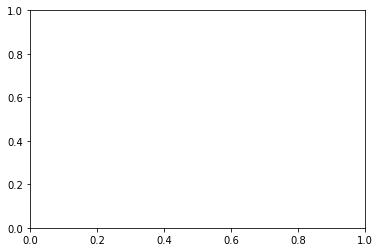

In [3]:
import matplotlib.pyplot as plt

y=[1,2]#给出在y轴上的位置
width=[5,4]#给出具体每个直方图的数值
plt.barh(y,width, bar_width = 0.6)#绘制水平直方图
plt.show()#显示

Text(0.5, 1.0, 'Figure 2: Linear Regression Coefficients')

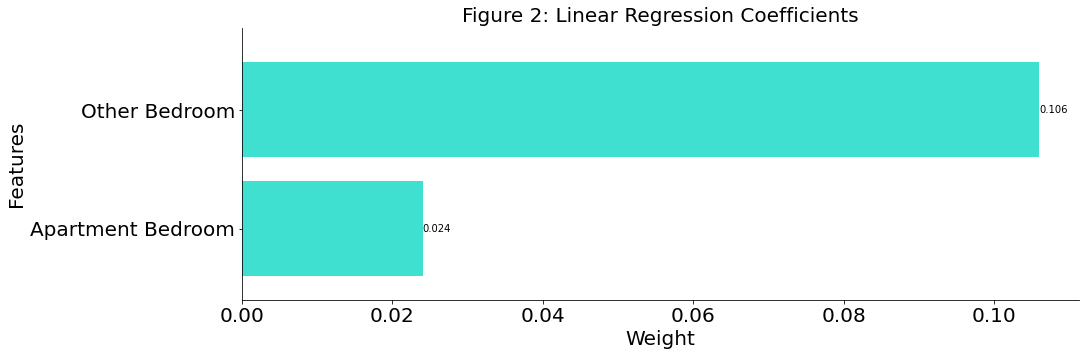

In [54]:
import numpy as np
import matplotlib.pyplot as plt
# 准备数据
labels = (['1', '2', '3', '4', 'Apartment Bedroom', 'Other Bedroom'])
a = np.array([0, 0, 0, 0, 0, 0]) # 使用np.array是方便后面的left相加
b = np.array([0, 0, 0, 0, 0.024, 0.106])
fig, ax = plt.subplots(figsize=(15, 5))# 绘制画布
ax3 = ax.barh(labels, b, align='center', color='turquoise', left=a,
       label='10')
ax.tick_params(labelsize=20)
w = ax3[5].get_width()
ax.text(w, ax3[5].get_y()+ax3[5].get_height()/2,
            "%.3f" % w, ha='left', va='center')
w = ax3[4].get_width()
ax.text(w, ax3[4].get_y()+ax3[4].get_height()/2,
            "%.3f" % w, ha='left', va='center')
ax.set_ylim(3.4)
ax.set_xlabel("Weight", fontsize=20)
ax.set_ylabel("Features", fontsize=20)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure 2: Linear Regression Coefficients", fontsize=20)




In [ ]:
ax.bar()
